#### Name: Akshat Bhat

#### UID: 2018130003

#### Roll No. 5

#### BE COMPS

## Exp 1 A] Logistic Regression using Horse Colic Dataset to predict whether a horse lived, died or was euthanized

#### Importing the necessary libraries

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the dataset

In [179]:
df = pd.read_csv('horse.csv')

In [180]:
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

We can see that some columns have null values which need to be handled

In [182]:
print("Shape of data (samples, features): ",df.shape)

Shape of data (samples, features):  (299, 28)


The dataset has 299 rows and 28 columns

In [183]:
df.dtypes.value_counts()

object     17
float64     7
int64       4
dtype: int64

17 columns are categorical and the rest 11 are numeric columns

In [184]:
nan_per = df.isna().sum()/len(df)*100

In [185]:
nan_per

surgery                   0.000000
age                       0.000000
hospital_number           0.000000
rectal_temp              20.066890
pulse                     8.026756
respiratory_rate         19.397993
temp_of_extremities      18.729097
peripheral_pulse         23.076923
mucous_membrane          15.719064
capillary_refill_time    10.702341
pain                     18.394649
peristalsis              14.715719
abdominal_distention     18.729097
nasogastric_tube         34.782609
nasogastric_reflux       35.451505
nasogastric_reflux_ph    82.274247
rectal_exam_feces        34.113712
abdomen                  39.464883
packed_cell_volume        9.698997
total_protein            11.036789
abdomo_appearance        55.183946
abdomo_protein           66.220736
outcome                   0.000000
surgical_lesion           0.000000
lesion_1                  0.000000
lesion_2                  0.000000
lesion_3                  0.000000
cp_data                   0.000000
dtype: float64

The above Series shows the percentage of null values in each column

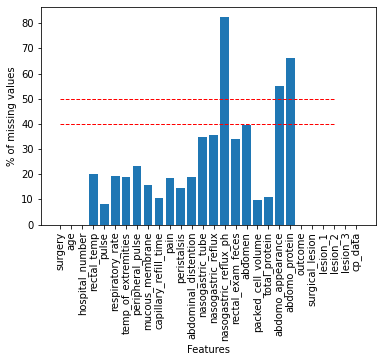

In [186]:
plt.plot([0, 25], [50,50], 'r--', lw=1)
plt.plot([0, 25], [40,40], 'r--', lw=1)
plt.bar(range(len(nan_per)),nan_per)
plt.xlabel('Features')
plt.ylabel('% of missing values')
plt.xticks(list(range(len(df.columns))),list(df.columns.values),rotation='vertical')
plt.show()

The graph shows the percentage of missing values in each feature, most of the features have less than 40% missing values and no feature has missing values between 40% and 50%

#### Splitting features into categorical and numeric

In [187]:
obj_columns = []
nonobj_columns = []
for col in df.columns.values:
    if df[col].dtype=='object':
        obj_columns.append(col)
    else:
        nonobj_columns.append(col)

In [188]:
print(f"{len(obj_columns)} Object(Categorical) Columns are \n",obj_columns,'\n')
print(f"{len(nonobj_columns)} Non-object(Numeric) columns are \n",nonobj_columns)

df_obj = df[obj_columns]
df_nonobj = df[nonobj_columns]

17 Object(Categorical) Columns are 
 ['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'outcome', 'surgical_lesion', 'cp_data'] 

11 Non-object(Numeric) columns are 
 ['hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein', 'abdomo_protein', 'lesion_1', 'lesion_2', 'lesion_3']


### Handling missing values
- For columns with more than 50% missing values => Remove Columns
- For columns with less than 50% missing values
1. For Numerical Data: Replace missing values with median value of that particular column
2. For Categorical Data: Replace missing values with mode value of that particular column

#### For Numerical Data

In [189]:
for col in df_nonobj.columns.values: # Iterate through all numeric columns
    if (pd.isna(df_nonobj[col]).sum())>0: # If column has null values
        if pd.isna(df_nonobj[col]).sum()>(0.5*len(df_nonobj)): # Remove column if it has more than 50% null values
            print(col,"has been removed")
            df_nonobj = df_nonobj.drop([col], axis=1)
        else:
            df_nonobj[col] = df_nonobj[col].fillna(df_nonobj[col].median()) # Else, fill the null values with the median of the non-null values

nasogastric_reflux_ph has been removed
abdomo_protein has been removed


#### For Categorical Data

In [190]:
for col in df_obj.columns.values: # Iterate through all categorical columns
    if (pd.isna(df_obj[col]).sum())>0: # If column has null values
        if pd.isna(df_obj[col]).sum()>(0.5*len(df_obj)): # Remove column if it has more than 50% null values
            print(col,"has been removed")
            df_obj = df_obj.drop([col], axis=1)
        else:
            df_obj[col] = df_obj[col].fillna(df_obj[col].mode()) # Else, fill the null values with the mode of the non-null values

abdomo_appearance has been removed


In [191]:
print("Shape of categorical data (samples, features): ",df_obj.shape)
print("Shape of numeric data (samples, features): ",df_nonobj.shape)

Shape of categorical data (samples, features):  (299, 16)
Shape of numeric data (samples, features):  (299, 9)


The dataset now has 299 rows and 25 columns out of which 16 are categorical

### Exploratory Data Analysis

In [192]:
df_eda = pd.concat([df_nonobj,df_obj],axis=1) # Merging the two dataframes only for EDA
df_eda['outcome'].value_counts()

lived         178
died           77
euthanized     44
Name: outcome, dtype: int64

<AxesSubplot:xlabel='outcome', ylabel='count'>

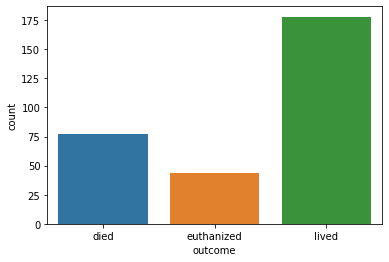

In [193]:
sns.countplot(data=df_eda, x="outcome")

In this dataset, we have more 'lived' outcomes than 'died' outcomes

<AxesSubplot:xlabel='outcome', ylabel='count'>

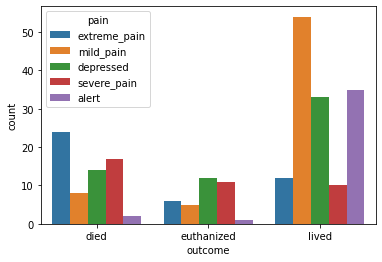

In [194]:
sns.countplot(data=df_eda, x='outcome', hue = 'pain')

We can see that extreme pain corresponds to death, and if the hore had mild pain it is more likely than it lives

<AxesSubplot:xlabel='outcome', ylabel='count'>

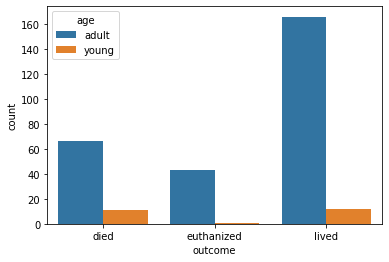

In [195]:
sns.countplot(data=df_eda, x='outcome', hue = 'age')

Unexpectedly, we cannot infer much from the age(adult or young) of the horse

<AxesSubplot:xlabel='outcome', ylabel='count'>

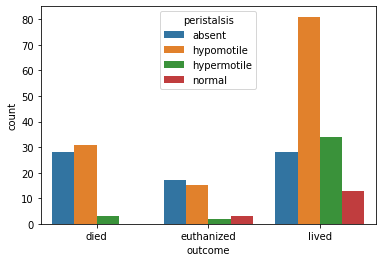

In [196]:
sns.countplot(data=df_eda, x='outcome', hue = 'peristalsis')

We can infer that if peristalsis if not normal, the horse is likely to die

<AxesSubplot:xlabel='outcome', ylabel='count'>

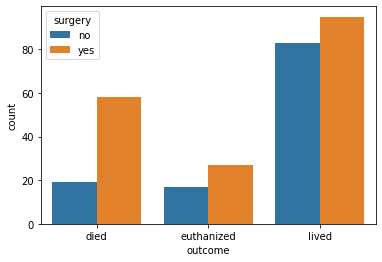

In [197]:
sns.countplot(data=df_eda, x='outcome', hue = 'surgery')

In case of whether the horse has undergone surgery or not, the data is fairly mixed. There is almost an equal distribution(surgery yes or no) for horses that lived but for horses that died, it is observed that there are more cases of surgery being done rather than not being done

**Further EDA will be done after converting categorical columns to numeric columns and finding the correlation between features**

#### Converting categorical columns to numeric using label encoding

In [198]:
for col in df_obj.columns.values:
    df_obj[col] = df_obj[col].astype('category').cat.codes # Encoding categorical columns
    
merged_df = pd.concat([df_nonobj,df_obj],axis=1) # Merging the two dataframes

target = df['outcome'] # Outcome is the target feature
print(target.value_counts())

target = merged_df['outcome']
print(target.value_counts())

lived         178
died           77
euthanized     44
Name: outcome, dtype: int64
2    178
0     77
1     44
Name: outcome, dtype: int64


##### As we know Outcome is the target variable, we can see that it has been encoded as 0,1,2 for died, euthanized and lived respectively

In [199]:
outcome_dict = {0:'died',1:'euthanized',2:'lived'}

In [200]:
merged_df.head()

,hospital_number,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,lesion_1,lesion_2,lesion_3,surgery,...,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,outcome,surgical_lesion,cp_data
0,530101,38.5,66.0,28.0,45.0,8.4,11300,0,0,0,...,2,0,2,2,2,1,0,0,0,0
1,534817,39.2,88.0,20.0,50.0,85.0,2208,0,0,1,...,3,0,3,-1,-1,0,4,1,0,0
2,530334,38.3,40.0,24.0,33.0,6.7,0,0,0,0,...,3,2,1,-1,-1,3,3,2,0,1
3,5290409,39.1,164.0,84.0,48.0,7.2,2208,0,0,1,...,1,0,2,0,0,1,-1,0,1,1
4,530255,37.3,104.0,35.0,74.0,7.4,4300,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,0,0,0


#### Checking the correlation of features

<AxesSubplot:>

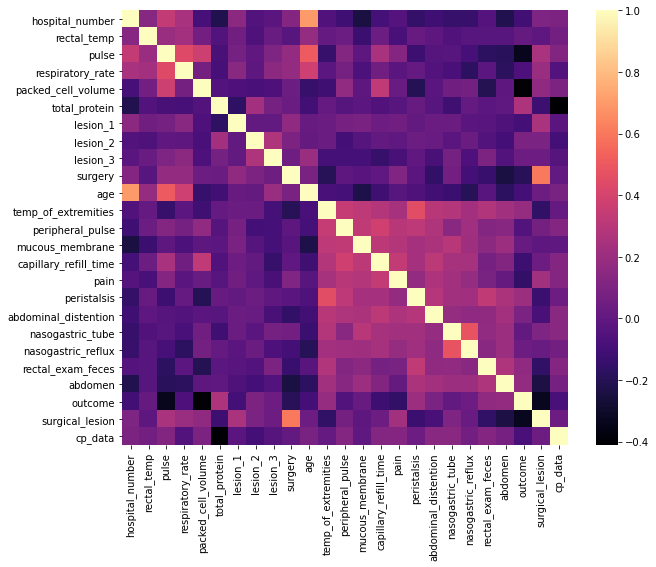

In [201]:
df_corr = merged_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(df_corr,cmap='magma')

In [202]:
df_corr['outcome'].sort_values(ascending=False)

outcome                  1.000000
total_protein            0.265889
peristalsis              0.201047
temp_of_extremities      0.185245
abdomen                  0.173353
rectal_exam_feces        0.165896
lesion_2                 0.098993
abdominal_distention     0.094556
nasogastric_reflux       0.044803
lesion_3                 0.044631
mucous_membrane          0.022311
rectal_temp              0.013273
nasogastric_tube         0.003411
peripheral_pulse        -0.049982
respiratory_rate        -0.068581
cp_data                 -0.078066
lesion_1                -0.100738
age                     -0.101782
hospital_number         -0.106396
capillary_refill_time   -0.121691
pain                    -0.152912
surgery                 -0.189222
surgical_lesion         -0.332933
pulse                   -0.335550
packed_cell_volume      -0.398371
Name: outcome, dtype: float64

We can see that in case of **positive correlation**, **total_protein** and **peristalsis** have significantly higher correlation than other features. And in case of **negative correlation**, **packed_cell_volume**, **pulse** and **surgical_lesion** are more highly correlated with outcome than other features

#### Removal of features having very less correlation (less than 10%)

In [203]:
print("Data Size Before Correlated Column Removal :",merged_df.shape)

df_corr_outcome = df_corr['outcome'].sort_values(ascending=False)
df_corr_outcome = abs(df_corr_outcome).sort_values(ascending=False)
for col in range(len(df_corr_outcome)):
        if abs(df_corr_outcome[col])<0.1:
            merged_df.drop([df_corr_outcome.index[col]], axis=1, inplace=True)
            print(df_corr_outcome.index[col],"removed")
print("Data Size After Correlated Column Removal :",merged_df.shape)

Data Size Before Correlated Column Removal : (299, 25)
lesion_2 removed
abdominal_distention removed
cp_data removed
respiratory_rate removed
peripheral_pulse removed
nasogastric_reflux removed
lesion_3 removed
mucous_membrane removed
rectal_temp removed
nasogastric_tube removed
Data Size After Correlated Column Removal : (299, 15)


#### Further EDA
The two highly correlated(in our case, negatively correlated) features that are **packed_cell_volume** and **pulse** can be analysed

**Packed Cell Volume vs Outcome**

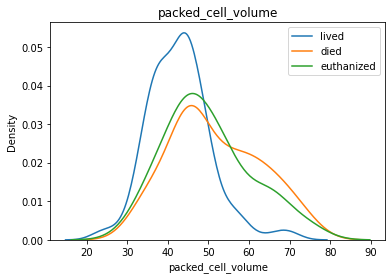

In [204]:
col = 'packed_cell_volume'

y = merged_df[col][target==2]
x = merged_df['outcome'][target==2]
sns.kdeplot(y)

y = merged_df[col][target==0]
x = merged_df['outcome'][target==0]

sns.kdeplot(y)

y = merged_df[col][target==1]
x = merged_df['outcome'][target==1]

sns.kdeplot(y)

plt.title(col)
plt.legend(['lived','died','euthanized'])
plt.show()

We can see that around packed_cell_volume between 50 and 60, the outcome is likely to be euthanized and after 60 the outcome is highly likely to be died.

**Pulse vs Outcome**

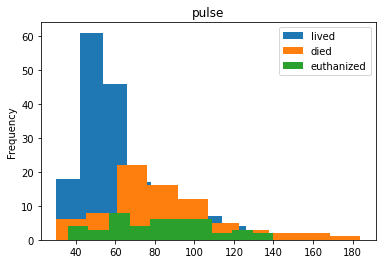

In [205]:
col = 'pulse'

y = merged_df[col][target==2]
x = merged_df['outcome'][target==2]
y.plot.hist()

y = merged_df[col][target==0]
x = merged_df['outcome'][target==0]
y.plot.hist()

y = merged_df[col][target==1]
x = merged_df['outcome'][target==1]
y.plot.hist()

plt.title(col)
plt.legend(['lived','died','euthanized'])
plt.show()

We can see that after pulse crosses 140, the probability of outcome being died is the highest. Around pulse equal to 60, the outcome is likely to be died but after pulse equal to 100, there is higher probability for the horse to be euthanized.

<AxesSubplot:xlabel='pulse', ylabel='packed_cell_volume'>

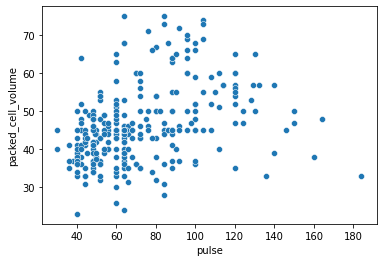

In [206]:
sns.scatterplot(data=merged_df,x='pulse',y='packed_cell_volume')

We can see that the pulse and packed_cell_volume features are somewhat linearly correlated.

### Splitting Data into Train and Test and Model Selection/Training

In [207]:
from sklearn.model_selection import train_test_split
X = merged_df.drop('outcome',axis=1)
y = merged_df['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 20% Test split

In [208]:
X

,hospital_number,pulse,packed_cell_volume,total_protein,lesion_1,surgery,age,temp_of_extremities,capillary_refill_time,pain,peristalsis,rectal_exam_feces,abdomen,surgical_lesion
0,530101,66.0,45.0,8.4,11300,0,0,1,2,2,0,1,0,0
1,534817,88.0,50.0,85.0,2208,1,0,-1,1,3,0,0,4,0
2,530334,40.0,33.0,6.7,0,0,0,2,1,3,2,3,3,0
3,5290409,164.0,48.0,7.2,2208,1,1,0,2,1,0,1,-1,1
4,530255,104.0,74.0,7.4,4300,0,0,-1,2,-1,-1,-1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,533886,120.0,55.0,65.0,3205,1,0,0,2,1,0,-1,0,0
295,527702,72.0,44.0,7.5,2208,0,0,1,2,4,2,0,1,1
296,529386,72.0,60.0,6.8,3205,1,0,0,1,4,0,1,0,1
297,530612,100.0,50.0,6.0,2208,1,0,1,1,3,2,0,1,1


In [209]:
y

0      0
1      1
2      2
3      0
4      0
      ..
294    1
295    1
296    0
297    2
298    1
Name: outcome, Length: 299, dtype: int8

#### Logistic Regression Model

In [210]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [211]:
# Model Evaluation
print('Classification Report\n',classification_report(y_test, predictions))
print('Confusion Matrix\n',confusion_matrix(y_test, predictions))
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision Score:",metrics.precision_score(y_test, predictions, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score:",metrics.recall_score(y_test, predictions, 
                                           pos_label='positive',
                                           average='micro'))

Classification Report
               precision    recall  f1-score   support

           0       0.33      0.06      0.10        17
           1       0.00      0.00      0.00        10
           2       0.54      0.94      0.69        33

    accuracy                           0.53        60
   macro avg       0.29      0.33      0.26        60
weighted avg       0.39      0.53      0.41        60

Confusion Matrix
 [[ 1  0 16]
 [ 0  0 10]
 [ 2  0 31]]
Accuracy: 0.5333333333333333
Precision Score: 0.5333333333333333
Recall Score: 0.5333333333333333


Since the accuracy can be improved, we perform **Model's Hyperparameter Tuning**.

In [212]:
solvers = ['newton-cg', 'lbfgs', 'liblinear','sag', 'saga'] # Solver alogirthms used to solve logistic regression as an optimisation problem
penalty = ['l2'] # Regularization is a way to avoid overfitting by penalizing high-valued regression coefficients. It reduces parameters and shrinks (simplifies) the model. 
c_values = [100, 10, 1.0, 0.1, 0.01] # Parameter - Inverse of regularization strength and Smaller values have more regularization

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) # Repeats Stratified K-Fold n times with different randomization in each repetition
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s\n" % (grid_result.best_score_, grid_result.best_params_)) # Showing the best result and saving the other results and printing them
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.678080 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}

0.675302 (0.072695) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.597101 (0.032925) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.585749 (0.044893) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.606703 (0.019653) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.606703 (0.019653) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.678080 (0.073895) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.595652 (0.029314) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.585628 (0.047402) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.596558 (0.057710) with: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
0.606703 (0.019653) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.669746 (0.077744) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.595652 (0.029314) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.581461 (0.049217) with: {'C': 1.0, 'penal

In [213]:
grid_result

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [214]:
grid_result.best_estimator_

LogisticRegression(C=10, solver='newton-cg')

In [215]:
final_model = grid_result.best_estimator_

### Model Evaluation

In [216]:
pred = final_model.predict(X_test)
print('Classification Report\n',classification_report(y_test, pred))
print('Confusion Matrix\n',confusion_matrix(y_test, pred))
print("Accuracy:",metrics.accuracy_score(y_test, pred))
print("Precision Score:",metrics.precision_score(y_test, pred, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score:",metrics.recall_score(y_test, pred, 
                                           pos_label='positive',
                                           average='micro'))

Classification Report
               precision    recall  f1-score   support

           0       0.64      0.53      0.58        17
           1       1.00      0.20      0.33        10
           2       0.68      0.91      0.78        33

    accuracy                           0.68        60
   macro avg       0.77      0.55      0.56        60
weighted avg       0.72      0.68      0.65        60

Confusion Matrix
 [[ 9  0  8]
 [ 2  2  6]
 [ 3  0 30]]
Accuracy: 0.6833333333333333
Precision Score: 0.6833333333333333
Recall Score: 0.6833333333333333


Text(0.5, 257.44, 'Predicted label')

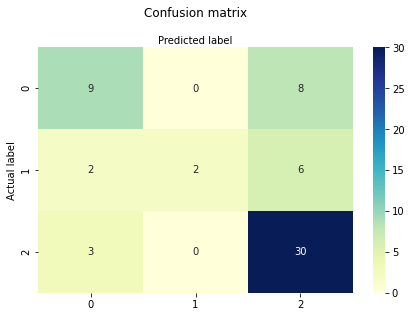

In [217]:
class_names=[0,1,2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [218]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return metrics.roc_auc_score(y_test, y_pred, average=average)
print('ROC AOC Score:',multiclass_roc_auc_score(y_test,pred))

ROC AOC Score: 0.6672841809184717


As the ROC AOC Score is above 0.5 but less than 0.7, we can say that the trained model is just about acceptable.

-----------------------------------------------------------------------------------------------------------

## Exp 1 B] Logistic Regression using Credit Score Dataset to predict Risk

#### Loading the dataset

In [219]:
df = pd.read_csv('german_credit_data_with_risk.csv')
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [220]:
df = df.iloc[:,1:]
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


We can see that some columns have null values which need to be handled

In [222]:
print("Shape of data (samples, features): ",df.shape)

Shape of data (samples, features):  (1000, 10)


The dataset has 1000 rows and 10 columns

In [223]:
df.dtypes.value_counts()

object    6
int64     4
dtype: int64

6 columns are categorical and the rest 4 are numeric columns

In [224]:
nan_per = df.isna().sum()/len(df)*100

In [225]:
nan_per

Age                  0.0
Sex                  0.0
Job                  0.0
Housing              0.0
Saving accounts     18.3
Checking account    39.4
Credit amount        0.0
Duration             0.0
Purpose              0.0
Risk                 0.0
dtype: float64

The above Series shows the percentage of null values in each column

In [226]:
df['Saving accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [227]:
df['Saving accounts'].isna().sum()

183

### Handling missing values
- For columns with more than 50% missing values => Remove Columns
- For columns with less than 50% missing values
1. For Numerical Data: Replace missing values with median value of that particular column
2. For Categorical Data: Replace missing values with mode value of that particular column

#### For Categorical Data (as there are no null values in Numeric Columns)

In [228]:
m = df['Saving accounts'].mode()
df['Saving accounts'].fillna(m[0],inplace=True)

In [229]:
m = df['Checking account'].mode()
df['Checking account'].fillna(m[0],inplace=True)

In [230]:
nan_per = df.isna().sum()/len(df)*100

In [231]:
nan_per

Age                 0.0
Sex                 0.0
Job                 0.0
Housing             0.0
Saving accounts     0.0
Checking account    0.0
Credit amount       0.0
Duration            0.0
Purpose             0.0
Risk                0.0
dtype: float64

In [232]:
df['Saving accounts'].value_counts()

little        786
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [233]:
df['Checking account'].value_counts()

little      668
moderate    269
rich         63
Name: Checking account, dtype: int64

### Exploratory Data Analysis

In order to visualise data better, **Age** and **Duration** columns have been classfied into intervals. Also **Monthly Pay** and **Square of Credit Amount** columns have been added.

In [234]:
df["Monthly pay"] = (df["Credit amount"] / df["Duration"])
df["Credit amount^2"] = df["Credit amount"]**2

In [235]:
df.insert(1,"Cat Age",np.NaN)
df.loc[df["Age"]<25,"Cat Age"]="0-25"
df.loc[((df["Age"]>=25) & (df["Age"]<30)),"Cat Age"]="25-30"
df.loc[((df["Age"]>=30) & (df["Age"]<35)),"Cat Age"]="30-35"
df.loc[((df["Age"]>=35) & (df["Age"]<40)),"Cat Age"]="35-40"
df.loc[((df["Age"]>=40) & (df["Age"]<50)),"Cat Age"]="40-50"
df.loc[((df["Age"]>=50) & (df["Age"]<76)),"Cat Age"]="50-75"

In [236]:
df.insert(9,"Cat Duration",df["Duration"])
for i in df["Cat Duration"]:
    if i<12:
        df["Cat Duration"] = df["Cat Duration"].replace(i,"0-12")
    elif (i>= 12) and (i<24):
        df["Cat Duration"]  =  df["Cat Duration"].replace(i,"12-24")
    elif (i>= 24) and (i<36):
        df["Cat Duration"] = df["Cat Duration"].replace(i,"24-36")
    elif (i>= 36) and (i<48):
        df["Cat Duration"] = df["Cat Duration"].replace(i,"36-48")
    elif (i>= 48) and (i<60):
        df["Cat Duration"] = df["Cat Duration"].replace(i,"48-60")
    elif (i>= 60) and (i<= 72):
        df["Cat Duration"] = df["Cat Duration"].replace(i,"60-72")

In [237]:
df.insert(4,"Cat Job",df["Job"])
df["Cat Job"] = df["Cat Job"].astype("category")
df["Cat Job"] = df["Cat Job"].replace(0,"unskilled")
df["Cat Job"] = df["Cat Job"].replace(1,"resident")
df["Cat Job"] = df["Cat Job"].replace(2,"skilled")
df["Cat Job"] = df["Cat Job"].replace(3,"highly skilled")

In [238]:
df["Job"] = pd.Categorical(df["Job"],categories = [0,1,2,3],ordered = True)
df["Cat Age"] = pd.Categorical(df["Cat Age"],categories = ['0-25','25-30', '30-35','35-40','40-50','50-75'])
df["Cat Duration"] = pd.Categorical(df["Cat Duration"],categories = ['0-12','12-24', '24-36','36-48','48-60','60-72'])

In [239]:
df.head()

,Age,Cat Age,Sex,Job,Cat Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Cat Duration,Purpose,Risk,Monthly pay,Credit amount^2
0,67,50-75,male,2,skilled,own,little,little,1169,6,0-12,radio/TV,good,194.833333,1366561
1,22,0-25,female,2,skilled,own,little,moderate,5951,48,48-60,radio/TV,bad,123.979167,35414401
2,49,40-50,male,1,resident,own,little,little,2096,12,12-24,education,good,174.666667,4393216
3,45,40-50,male,2,skilled,free,little,little,7882,42,36-48,furniture/equipment,good,187.666667,62125924
4,53,50-75,male,2,skilled,free,little,little,4870,24,24-36,car,bad,202.916667,23716900


<AxesSubplot:xlabel='Risk', ylabel='count'>

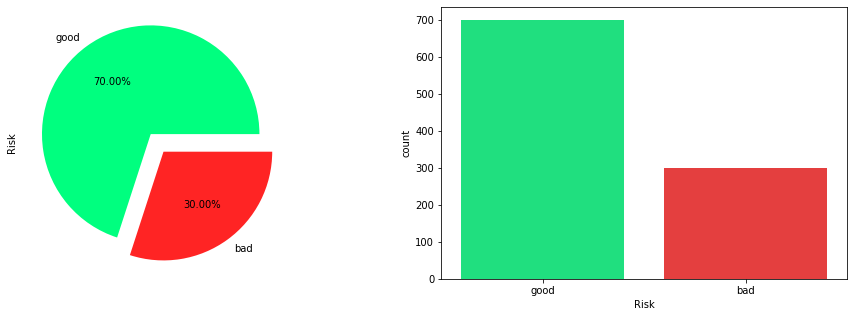

In [240]:
fig,ax=plt.subplots(ncols=2,figsize=(16,5))
df["Risk"].value_counts().plot.pie(autopct="%.2f%%",colors=['#00FF7F','#FF2424'],explode = (0.1, 0.1),ax=ax[0])
sns.countplot(df["Risk"],ax=ax[1],palette=['#00FF7F','#FF2424'])

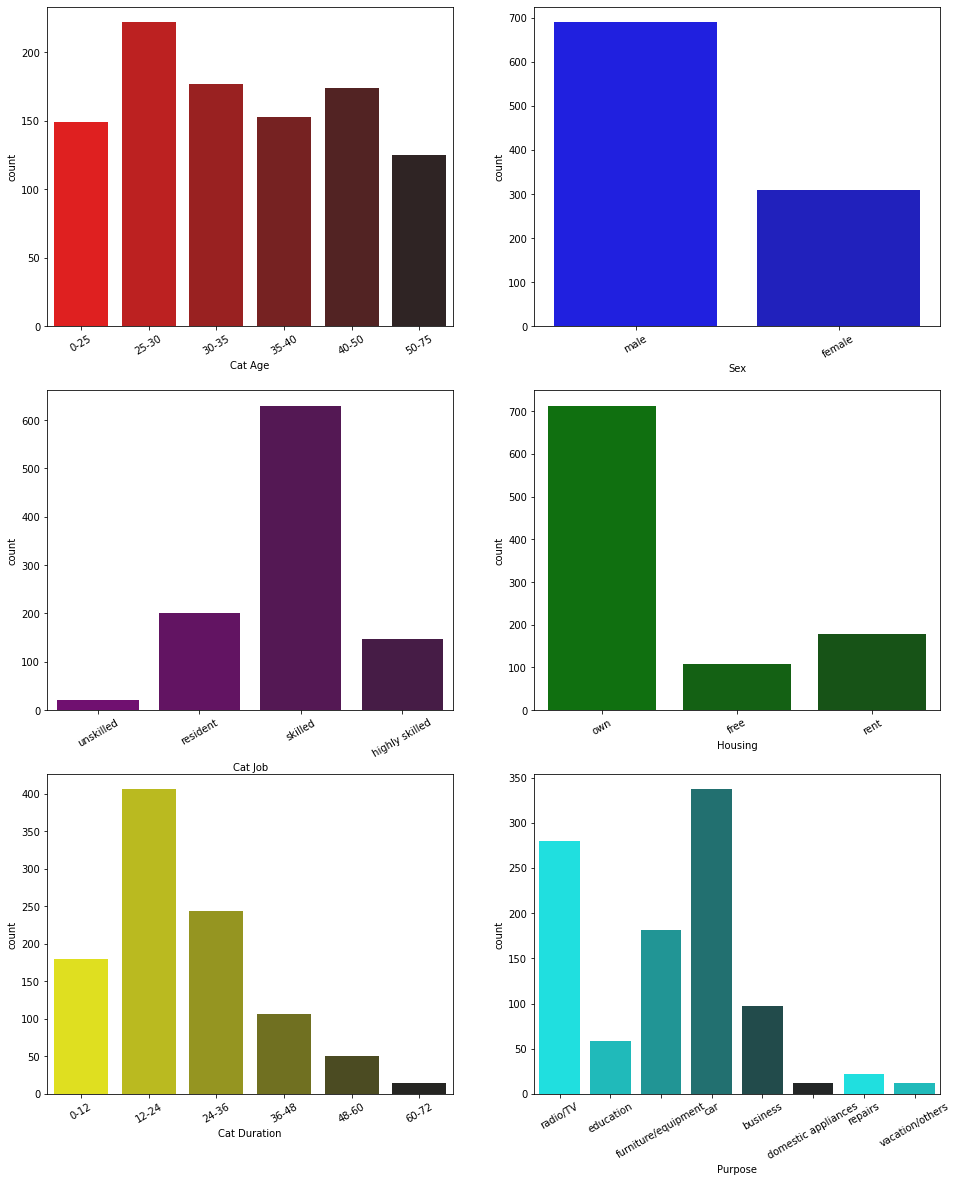

In [241]:
fig,ax=plt.subplots(ncols=2,nrows=3,figsize=(16,20))
cat_list=["Cat Age","Sex","Cat Job","Housing","Cat Duration","Purpose"]
palette=["red","blue","purple","green","yellow","cyan"]
count=0
for i in range(3):
    for j in range(2):
        sns.countplot(df[cat_list[count]],ax=ax[i][j],palette=sns.dark_palette(palette[count],reverse=True))
        ax[i][j].set_xticklabels(ax[i][j].get_xticklabels(),rotation=30)
        count+=1

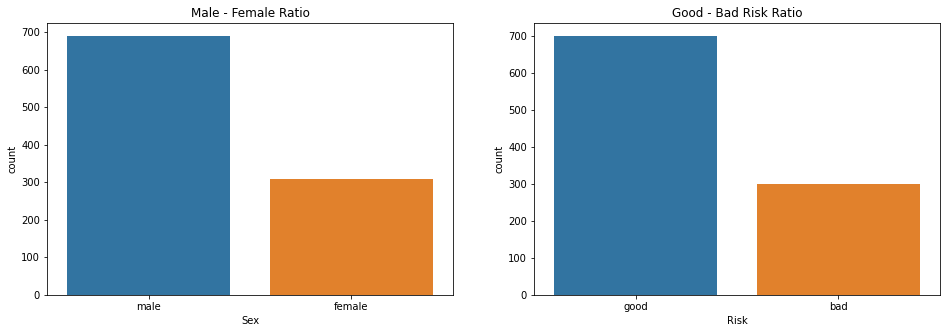

In [242]:
fig, ax = plt.subplots(1,2,figsize=(16,5))

sns.countplot(df['Sex'], ax=ax[0]).set_title('Male - Female Ratio');
sns.countplot(df.Risk, ax=ax[1]).set_title('Good - Bad Risk Ratio');

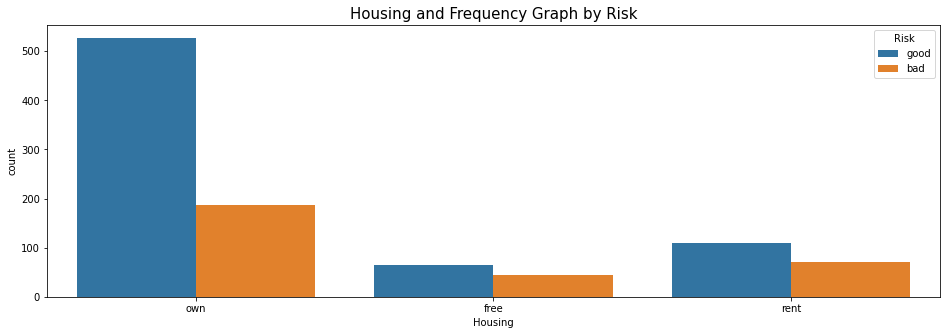

In [243]:
plt.figure(figsize=(16,5))
sns.countplot(x="Housing", hue="Risk", data=df).set_title("Housing and Frequency Graph by Risk", fontsize=15);
plt.show()

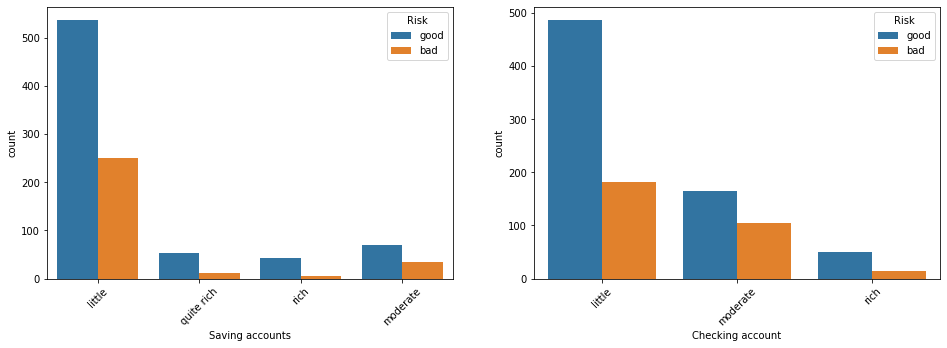

In [244]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,5))
sns.countplot(x="Saving accounts", hue="Risk", data=df, ax=ax1);
sns.countplot(x="Checking account", hue="Risk", data=df, ax=ax2);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
fig.show()

<AxesSubplot:xlabel='Sex', ylabel='Age'>

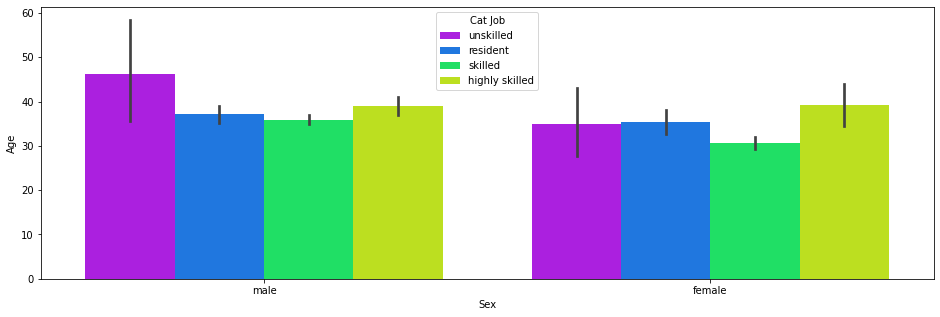

In [245]:
plt.figure(figsize=(16,5))
sns.barplot(data=df,x="Sex",y="Age",hue="Cat Job",palette="hsv_r")

<AxesSubplot:xlabel='Cat Age', ylabel='Credit amount'>

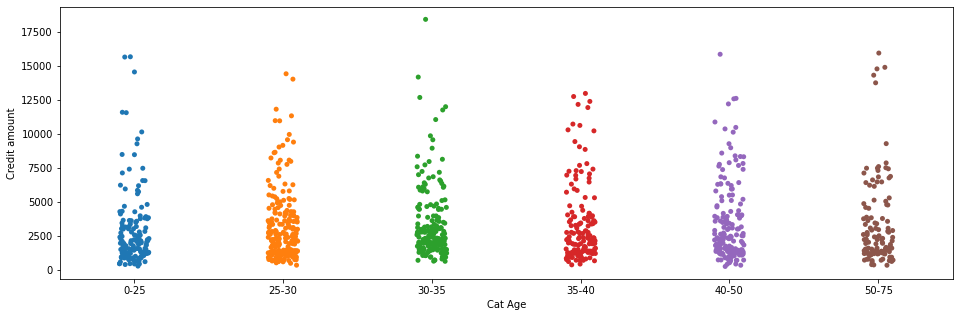

In [246]:
plt.figure(figsize = (16, 5))
sns.stripplot(x = "Cat Age", y = "Credit amount", data = df)

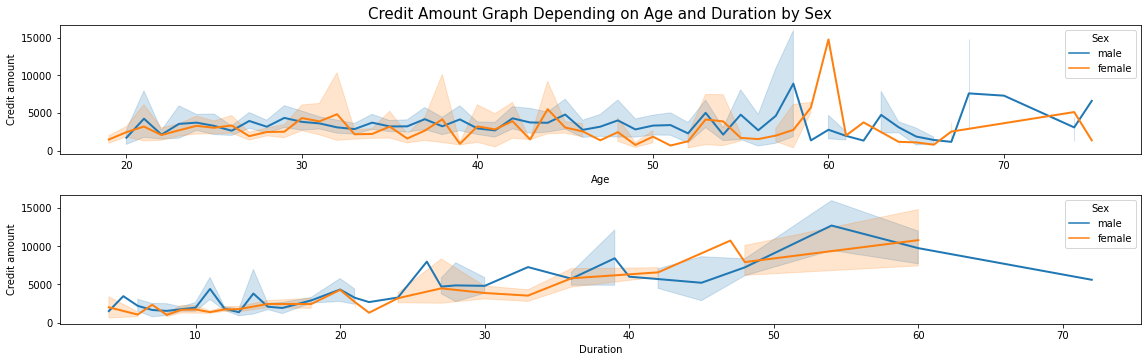

In [247]:
fig, ax = plt.subplots(2,1,figsize=(16,5))
plt.tight_layout(2)
sns.lineplot(data=df, x='Age', y='Credit amount', hue='Sex', lw=2, ax=ax[0]).set_title("Credit Amount Graph Depending on Age and Duration by Sex", fontsize=15);
sns.lineplot(data=df, x='Duration', y='Credit amount', hue='Sex', lw=2, ax=ax[1]);

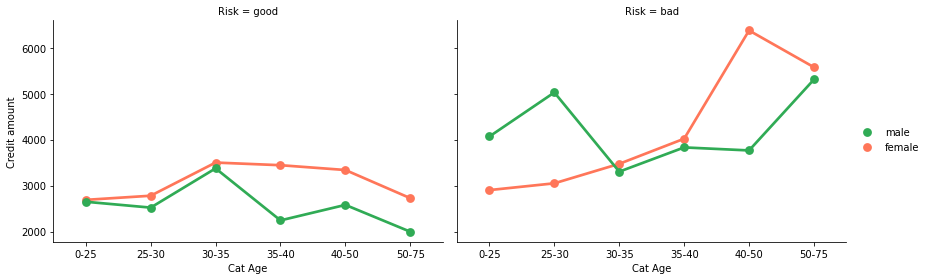

In [248]:
sns.FacetGrid(data=df,col="Risk",aspect=1.5,height=4).map(sns.pointplot,"Cat Age","Credit amount","Sex",palette=["#FF7659","#30AB55"],ci=None).add_legend();

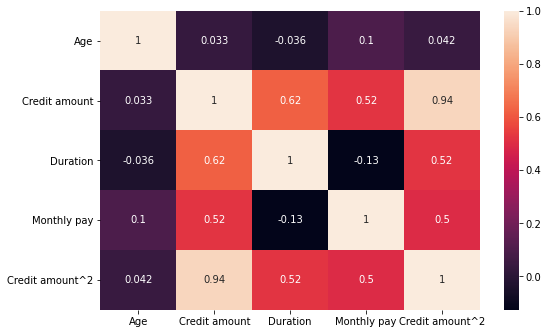

In [249]:
plt.figure(figsize=(8.5,5.5))
corr = sns.heatmap(df.corr(),xticklabels=df.corr().columns,yticklabels=df.corr().columns,annot=True)

### Data Preprocessing

In [250]:
df.head()

,Age,Cat Age,Sex,Job,Cat Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Cat Duration,Purpose,Risk,Monthly pay,Credit amount^2
0,67,50-75,male,2,skilled,own,little,little,1169,6,0-12,radio/TV,good,194.833333,1366561
1,22,0-25,female,2,skilled,own,little,moderate,5951,48,48-60,radio/TV,bad,123.979167,35414401
2,49,40-50,male,1,resident,own,little,little,2096,12,12-24,education,good,174.666667,4393216
3,45,40-50,male,2,skilled,free,little,little,7882,42,36-48,furniture/equipment,good,187.666667,62125924
4,53,50-75,male,2,skilled,free,little,little,4870,24,24-36,car,bad,202.916667,23716900


In [251]:
df["Age"],df["Duration"],df["Job"]=df["Cat Age"],df["Cat Duration"],df["Cat Job"]
df=df.drop(["Cat Age","Cat Duration","Cat Job"],axis=1)

In [252]:
liste_columns=list(df.columns)
liste_columns.remove("Sex")
liste_columns.remove("Risk")
liste_columns.remove("Credit amount")
liste_columns.remove("Monthly pay")
liste_columns.remove("Credit amount^2")

In [253]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df["Sex"]=label.fit_transform(df["Sex"])
df["Risk"]=label.fit_transform(df["Risk"])
df=pd.get_dummies(df,columns=liste_columns,prefix=liste_columns)

In [254]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df["Credit amount"]=scaler.fit_transform(df[["Credit amount"]])
df["Monthly pay"]=scaler.fit_transform(df[["Monthly pay"]])
df["Credit amount^2"]=scaler.fit_transform(df[["Credit amount^2"]])

In [255]:
df.head()

,Sex,Credit amount,Risk,Monthly pay,Credit amount^2,Age_0-25,Age_25-30,Age_30-35,Age_35-40,Age_40-50,...,Duration_48-60,Duration_60-72,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,1,0.050567,1,0.069461,0.003842,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0.313690,0,0.040642,0.104166,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,1,0.101574,1,0.061259,0.012761,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,1,0.419941,1,0.066546,0.182872,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,1,0.254209,0,0.072749,0.069699,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Splitting Data into Train and Test and Model Selection/Training

In [256]:
from sklearn.model_selection import train_test_split
X = df.drop(["Risk"],axis=1)
y = df["Risk"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 20% Test split

In [257]:
X

,Sex,Credit amount,Monthly pay,Credit amount^2,Age_0-25,Age_25-30,Age_30-35,Age_35-40,Age_40-50,Age_50-75,...,Duration_48-60,Duration_60-72,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,1,0.050567,0.069461,0.003842,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,0.313690,0.040642,0.104166,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,1,0.101574,0.061259,0.012761,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0.419941,0.066546,0.182872,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0.254209,0.072749,0.069699,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0.081765,0.049057,0.008696,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
996,1,0.198470,0.042508,0.043650,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
997,1,0.030483,0.017467,0.001721,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
998,1,0.087763,0.006892,0.009846,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [258]:
y

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Risk, Length: 1000, dtype: int32

#### Logistic Regression Model

In [259]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

### Model Evaluation

In [260]:
# Model Evaluation
print('Classification Report\n',classification_report(y_test, predictions))
print('Confusion Matrix\n',confusion_matrix(y_test, predictions))
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision Score:",metrics.precision_score(y_test, predictions))
print("Recall Score:",metrics.recall_score(y_test, predictions))

Classification Report
               precision    recall  f1-score   support

           0       0.61      0.25      0.35        68
           1       0.70      0.92      0.80       132

    accuracy                           0.69       200
   macro avg       0.66      0.58      0.58       200
weighted avg       0.67      0.69      0.65       200

Confusion Matrix
 [[ 17  51]
 [ 11 121]]
Accuracy: 0.69
Precision Score: 0.7034883720930233
Recall Score: 0.9166666666666666


Text(0.5, 257.44, 'Predicted label')

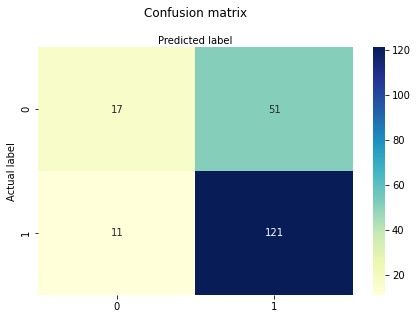

In [261]:
class_names=[0,1,2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, predictions)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

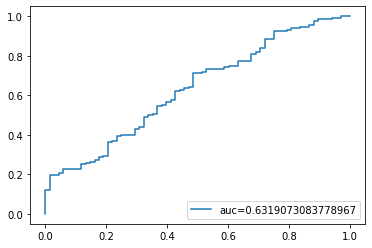

In [262]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

As the ROC AOC Score is between 0.7 and 0.8, we can say that the trained model is acceptable and good in judgement. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.

-----------------------------------------------------------------------------------------------------------

## Exp 1 B] Linear Regression using AutoMPG Dataset

#### Importing the necessary libraries

In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the dataset

In [264]:
df = pd.read_csv('auto-mpg.csv')

In [265]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


We can see that some columns have null values which need to be handled

In [267]:
print("Shape of data (samples, features): ",df.shape)

Shape of data (samples, features):  (398, 9)


The dataset has 398 rows and 9 columns

In [268]:
df.dtypes.value_counts()

int64      4
float64    3
object     2
dtype: int64

7 columns are categorical and the rest 2 are numeric columns

### Handling missing values

As **horsepower** is actually a numeric column we will remove the null values using imputation by median

In [269]:
missing_value = pd.DataFrame(df.horsepower.str.isdigit())  
df[missing_value['horsepower'] == False] 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [270]:
# Encoding '?' values as null values
df[df == '?'] = np.nan
df[missing_value['horsepower'] == False] 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


In [271]:
df.median()

mpg               23.0
cylinders          4.0
displacement     148.5
horsepower        93.5
weight          2803.5
acceleration      15.5
model year        76.0
origin             1.0
dtype: float64

In [272]:
# converting the hp column from object / string type to float
df['horsepower'] = df['horsepower'].astype('float64') 

In [273]:
nan_per = df.isna().sum()/len(df)*100

In [274]:
nan_per

mpg             0.000000
cylinders       0.000000
displacement    0.000000
horsepower      1.507538
weight          0.000000
acceleration    0.000000
model year      0.000000
origin          0.000000
car name        0.000000
dtype: float64

The above Series shows the percentage of null values in each column

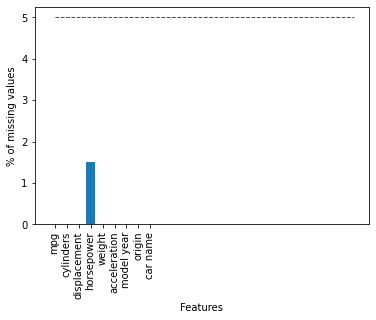

In [275]:
plt.plot([0, 25], [5,5], 'r--', lw=1)
plt.bar(range(len(nan_per)),nan_per)
plt.xlabel('Features')
plt.ylabel('% of missing values')
plt.xticks(list(range(len(df.columns))),list(df.columns.values),rotation='vertical')
plt.show()

The graph shows the percentage of missing values in each feature, all the features have less than 5% missing values.

In [276]:
df['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [277]:
df['horsepower'].median()

93.5

In [278]:
for col in ['horsepower']:
    df[col].fillna(df[col].median(), inplace=True)

In [279]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

All null values have been handled

### Exploratory Data Analysis

<AxesSubplot:xlabel='mpg', ylabel='Density'>

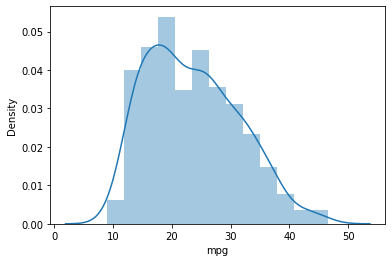

In [280]:
sns.distplot(df['mpg'])

The target variable somewhat has a normal distribution

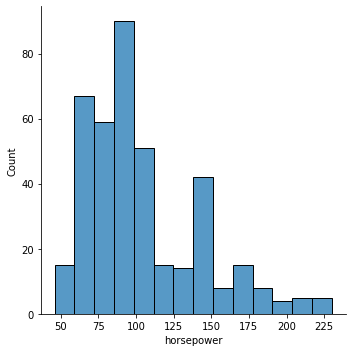

In [281]:
sns.displot(df['horsepower'])

The horsepower column values are a bit skewed to the lower side

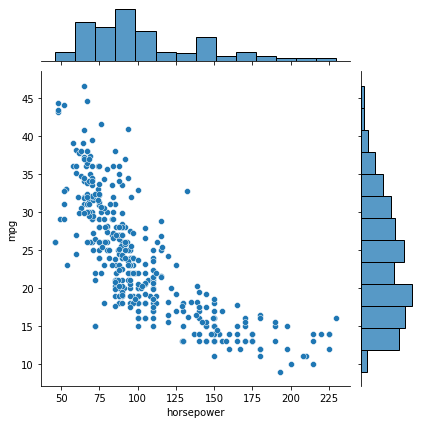

In [282]:
sns.jointplot(data=df,x='horsepower',y='mpg')

We can see that as horsepower increases, mpg decreases and the realtionship can be described by a linear fit

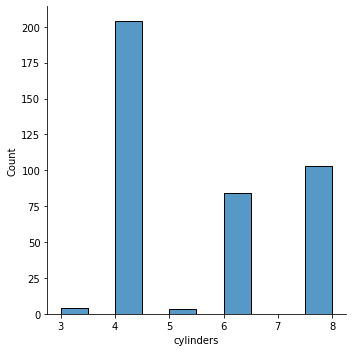

In [283]:
sns.displot(df['cylinders'])

The dataset majorly consists of vars having 4,6 or 8 cylinders

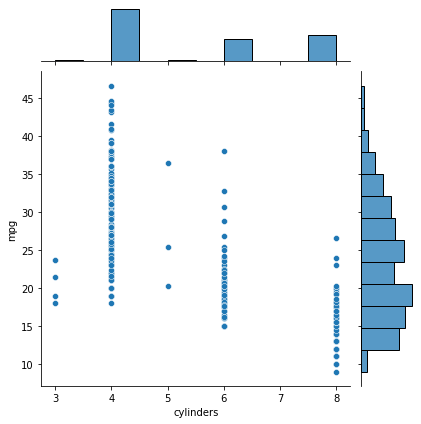

In [284]:
sns.jointplot(data=df,x='cylinders',y='mpg')

We cannot draw a definite inference from the mpg vs number of cylinders graph

<Figure size 864x864 with 0 Axes>

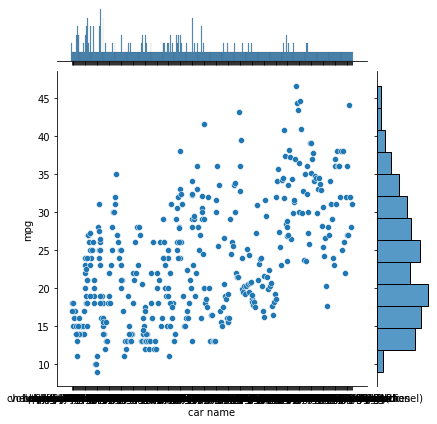

In [285]:
plt.figure(figsize=(12,12))
sns.jointplot(data=df,x='car name',y='mpg')

There is no correlation between the car name and mpg hence it can be removed

### Feature Engineering

In [286]:
df = df.drop('car name', axis=1) # Car names do not contribute to mpg target feature

# Also replacing the categorical var with actual values
df['origin'] = df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,america
1,15.0,8,350.0,165.0,3693,11.5,70,america
2,18.0,8,318.0,150.0,3436,11.0,70,america
3,16.0,8,304.0,150.0,3433,12.0,70,america
4,17.0,8,302.0,140.0,3449,10.5,70,america


#### Converting categorical columns to numeric using encoding

In [287]:
df = pd.get_dummies(df, columns=['origin'])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


#### Checking the correlation of features

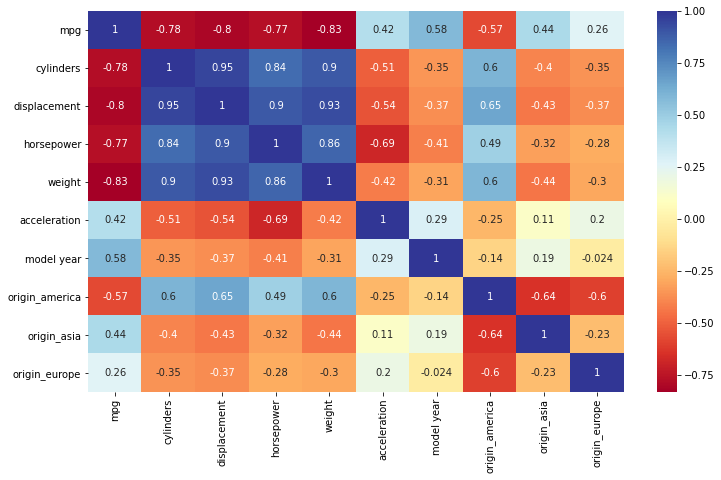

In [288]:
plt.rcParams['figure.figsize'] = [12,7]
sns.heatmap(df.corr(), annot = True, cmap = 'RdYlBu');

### Splitting Data into Train and Test and Model Selection/Training

In [289]:
X = df.drop(['mpg','origin_europe'], axis=1)
y = df[['mpg']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [291]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Printing the coefficients for each variable and the intercept

for idx, col_name in enumerate(X_train.columns):
    print(f"The coefficient for {col_name} is {regression_model.coef_[0][idx]}")

The coefficient for cylinders is -0.31102433833771964
The coefficient for displacement is 0.02468199702176243
The coefficient for horsepower is -0.021889583985445916
The coefficient for weight is -0.006717667751664869
The coefficient for acceleration is 0.19083471034988161
The coefficient for model year is 0.7617325807449364
The coefficient for origin_america is -2.56610172671245
The coefficient for origin_asia is 0.36951160114865184


In [292]:
intercept = regression_model.intercept_[0]
print(f"The intercept for model is {regression_model.intercept_}")

The intercept for model is [-16.82493968]


In [295]:
print("The score for the model is",regression_model.score(X_test,y_test))

The score for the model is 0.8226939742691548


In [297]:
predictions = regression_model.predict(X_test)

### Model Evaluation

In [300]:
# Model Evaluation
rmse = metrics.mean_squared_error(y_test, predictions) ** (0.5)
print('Root Mean Square Error is',rmse)

Root Mean Square Error is 3.3660345879714724


### Conclusion

- I understood how to apply logistic regression using sklearn on the horse colic dataset. I also understood what were the main features tht contributed to the death of a horse. After training a model, I obtained around 68% accuracy with a respectable ROC score of 0.6. This means that even though all preprocessing techniques were applied, the need of more data in order to improve accuracy still remains.
- Also, I implemented linear regression for the autompg dataset and during the process of coding explored various areas of preprocessing, data analysis and visualisation etc. After analysing various features I realised that the features that miles per gallon is affected the most by the number of cylinders a car has along with other factprs such as horsepower and the weight of the car.